# Setup

## Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import brokenaxes as brax

from mpl_toolkits.mplot3d import Axes3D

import colorcet as cc

import math as m

# from astropy.table import QTable, Table, Column
# from astropy.io import ascii
import scipy.integrate as inte
import scipy.optimize as opt
import scipy.linalg as la
import scipy.special as sp

from pfapack import pfaffian as pf

import itertools as itert


import mpmath as mpm

import xarray as xr

import fractions

import time

import importlib

import colormaps as cmaps

import pickle as pickle

import sys
import os

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import IPython.display

import pathlib

path_to_package = str(pathlib.Path(os.getcwd()))+'/Code/'
print(path_to_package)
sys.path.insert(0,path_to_package)


import MajoranaFermionChain as MFC
import GettingQuantumTensor as GQT

plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amsfonts} \usepackage{xcolor} \usepackage{stix}'
})

%matplotlib inline

import cvxpy as cp

mpm.mp.dps = 100



/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/


In [255]:
importlib.reload(MFC)
importlib.reload(GQT)

<module 'GettingQuantumTensor' from '/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/GettingQuantumTensor.py'>

## Other Stuff

### Symmetric Log Colormaps

These are used a few times. The idea is that the blue and red regions color the numbers that have been passed through the log while the green and yellow are the linear regions. 

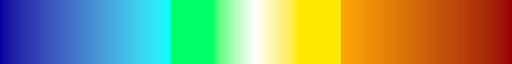

In [284]:
MFC.symlog_cmap(100, 1)

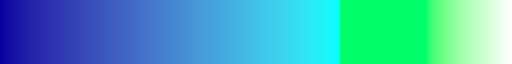

In [280]:
MFC.symlog_cmap(100, 1, half = 'lower')

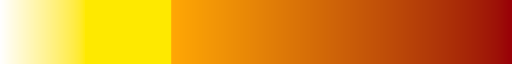

In [281]:
MFC.symlog_cmap(100, 1, half = 'upper')

# Basics

## Entanglement Entropy and Negativity for a Periodic Critical Ising Chain

In [52]:
N = 256
Jx = np.ones(N)
Jy = np.zeros(N)
g = np.ones(N)

Example_1_Model = MFC.MajoranaFermionChain(N = N, Jx = Jx, g = g, Jy = Jy, boundaries = 'periodic')

### Single Subsystem Entanglement Entropy

Text(0.5, 1.0, 'Entanglement Entropy for the interval $[0, i_f]$')

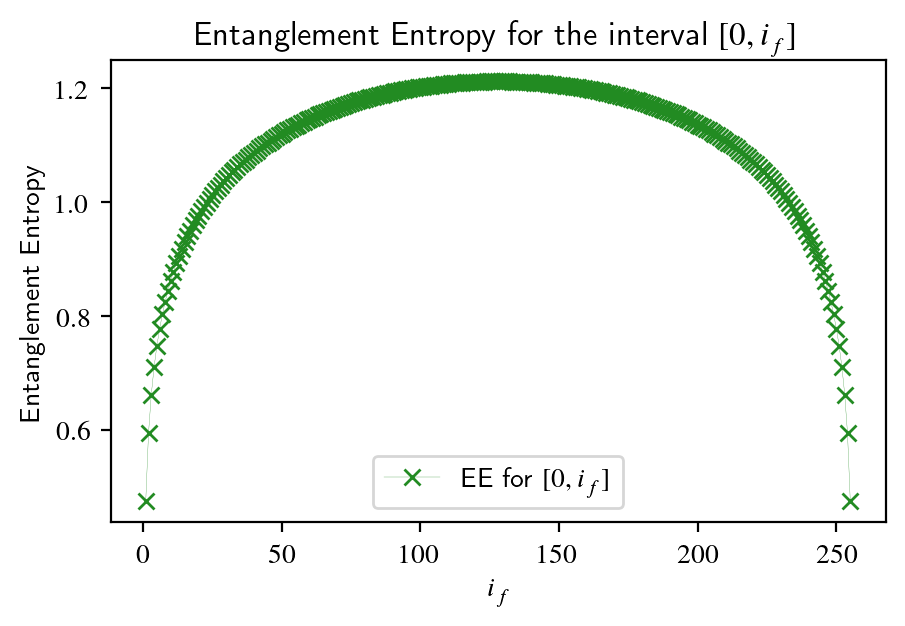

In [53]:
Ends_Array = np.arange(N-1)

Intervals = MFC.CartesianProduct2D([0], Ends_Array)

Entropies = Example_1_Model.Get_Entanglement_Entropies(Intervals, Return = True)

IPython.display.clear_output()

plt.figure(figsize = (5,3), dpi = 200)
plt.plot(Ends_Array+1, Entropies, marker = 'x', lw = 0.1, color = 'forestgreen', label = r'EE for $[0, i_f]$')
plt.xlabel(r'$i_f$')
plt.ylabel('Entanglement Entropy')
plt.legend()
plt.title(r'Entanglement Entropy for the interval $[0, i_f]$')

### Fermionic Negativity

In [39]:
subsystem_sizes = Example_1_Model.N//4

separations = np.arange(0, Example_1_Model.N//2+1)

intervals = []
for separation in separations:
    intervals.append([0, subsystem_sizes-1, subsystem_sizes+separation, 2*subsystem_sizes-1+separation])

negativities = Example_1_Model.Get_Entanglement_Negativities(intervals, Return = True)

Text(0.5, 1.0, 'Entanglement Negativity for Two Intervals of Size $N/4$')

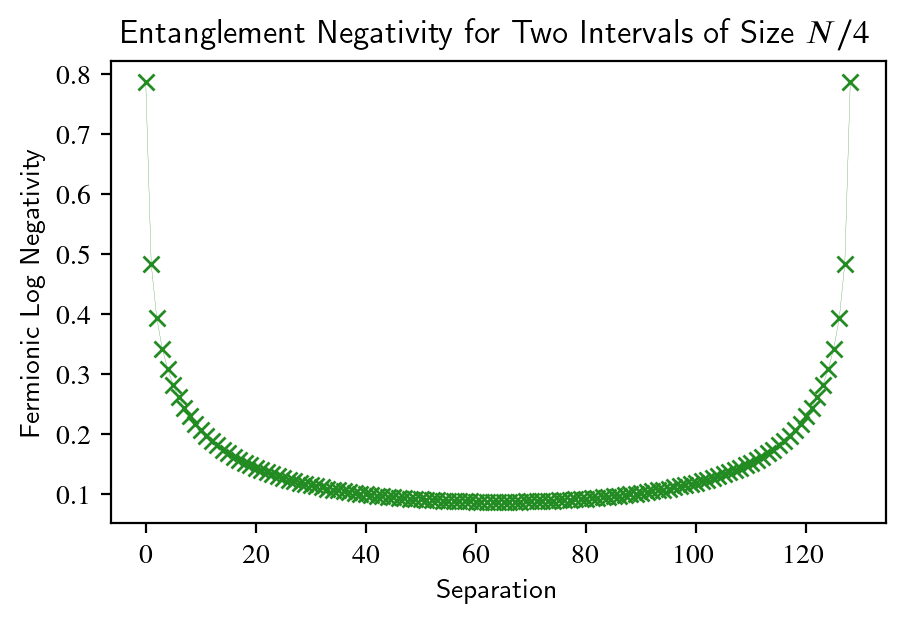

In [43]:

plt.figure(figsize = (5,3), dpi = 200)
plt.plot(separations, negativities, marker = 'x', lw = 0.1, color = 'forestgreen')
plt.xlabel(r'Separation')
plt.ylabel('Fermionic Log Negativity')
#plt.legend()
plt.title(r'Entanglement Negativity for Two Intervals of Size $N/4$')

The system is periodic, so as the separation goes past N/2, the separation on the other side goes to zero. 

## Entanglement Entropy and Negativity for an Open Critical Ising Chain

In [48]:
N = 256
Jx = np.ones(N)
Jy = np.zeros(N)
g = np.ones(N)

Example_2_Model = MFC.MajoranaFermionChain(N = N, Jx = Jx, g = g, Jy = Jy, boundaries = 'open')

### Single Subsystem Entanglement Entropy

Text(0.5, 1.0, 'Entanglement Entropy for the interval $[0, i_f]$')

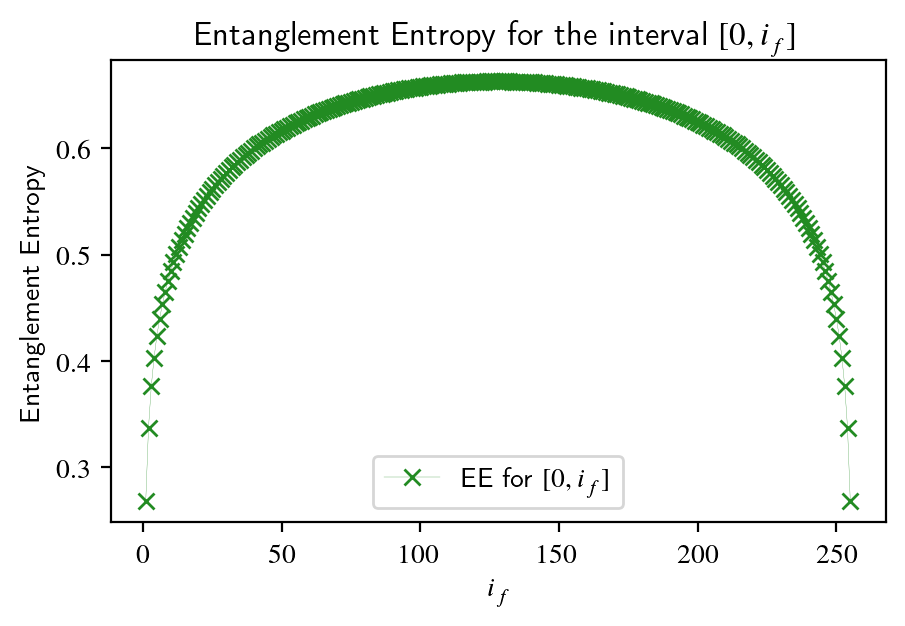

In [49]:
Ends_Array = np.arange(N-1)

Intervals = MFC.CartesianProduct2D([0], Ends_Array)

Entropies = Example_2_Model.Get_Entanglement_Entropies(Intervals, Return = True)

IPython.display.clear_output()

plt.figure(figsize = (5,3), dpi = 200)
plt.plot(Ends_Array+1, Entropies, marker = 'x', lw = 0.1, color = 'forestgreen', label = r'EE for $[0, i_f]$')
plt.xlabel(r'$i_f$')
plt.ylabel('Entanglement Entropy')
plt.legend()
plt.title(r'Entanglement Entropy for the interval $[0, i_f]$')

### Fermionic Negativity

In [50]:
subsystem_sizes = Example_2_Model.N//4

separations = np.arange(0, Example_2_Model.N//2+1)

intervals = []
for separation in separations:
    intervals.append([0, subsystem_sizes-1, subsystem_sizes+separation, 2*subsystem_sizes-1+separation])

negativities = Example_2_Model.Get_Entanglement_Negativities(intervals, Return = True)

Text(0.5, 1.0, 'Entanglement Negativity for Two Intervals of Size $N/4$')

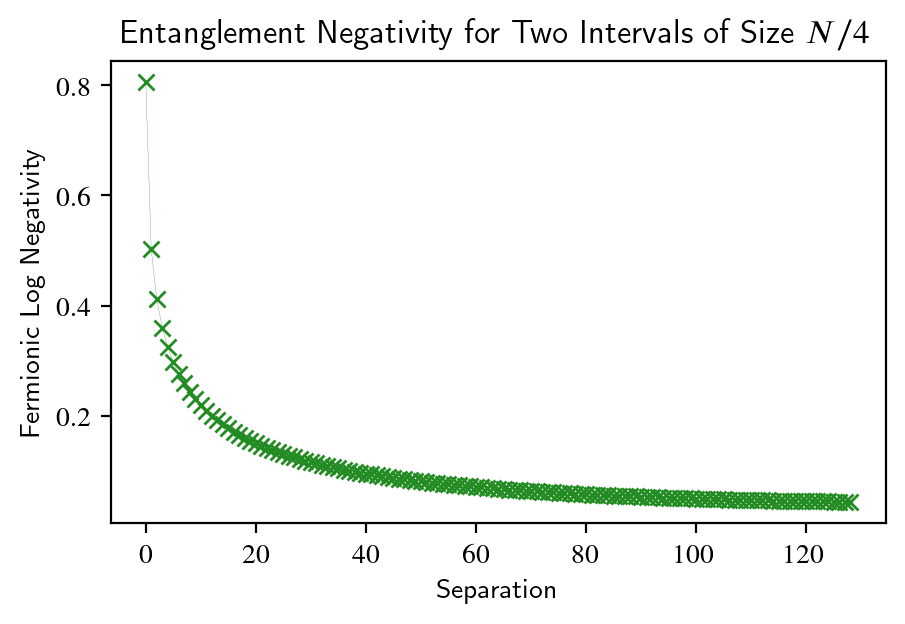

In [51]:

plt.figure(figsize = (5,3), dpi = 200)
plt.plot(separations, negativities, marker = 'x', lw = 0.1, color = 'forestgreen')
plt.xlabel(r'Separation')
plt.ylabel('Fermionic Log Negativity')
#plt.legend()
plt.title(r'Entanglement Negativity for Two Intervals of Size $N/4$')

# Quantum Geometric Tensor Examples

## $(h,\gamma)$ Parameter Space Metric

For this, the data is using already generated file in Code/QuantumTensorFiles/Final_Files and the built in structure for looking at the parameter space $(h,\gamma)$ for the Hamiltonian:

$$ H = \sum_{i\in\mathbb{Z_N}}\left[\frac{1}{2}(1+\gamma)\sigma^x_i\sigma^x_{i+1}+\frac{1}{2}(1-\gamma)\sigma^y_i\sigma^y_{i+1} + h\sigma_i^z\right]$$

In [59]:
file_name = 'Code/QuantumTensorFiles/Final_Files/StripOfParameterSpace_Periodic_Smaller_N_128_Step_Size_0.001.p'
with open(file_name, 'rb') as file:
    Main_DS = pickle.load(file) 

### Ricci Scalar

#### Linear Colormap

Text(0.5, 1.0, 'Ricci Scalar for System Size 128')

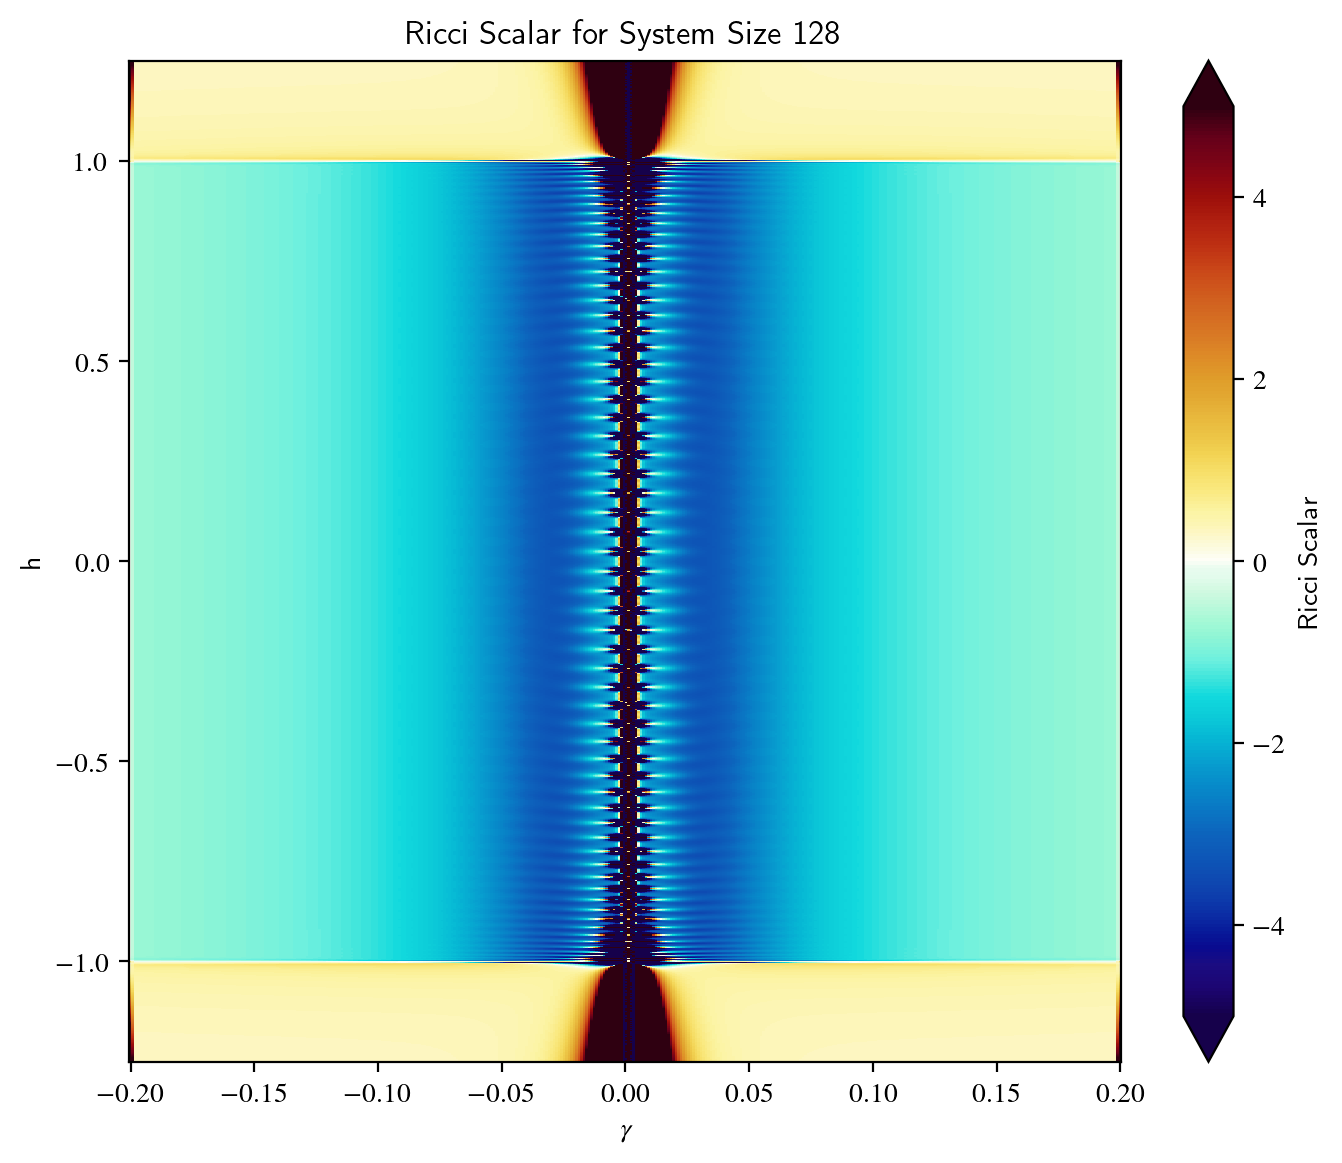

In [64]:
plt.figure(figsize=(8,6.5), dpi = 200)

vmax = 5
cmap = cmaps.div1_blue_orange


Main_DS['Ricci Scalar'].plot.imshow(x = 'gamma', y = 'h', vmin = -vmax, vmax = vmax, cmap = cmap)
plt.xlabel(r'$\gamma$')
plt.title(f"Ricci Scalar for System Size {Main_DS['Metric'].attrs['N']}")

#### Symmetric Log Colormap

Text(0.5, 1.0, 'Ricci Scalar for System Size 128')

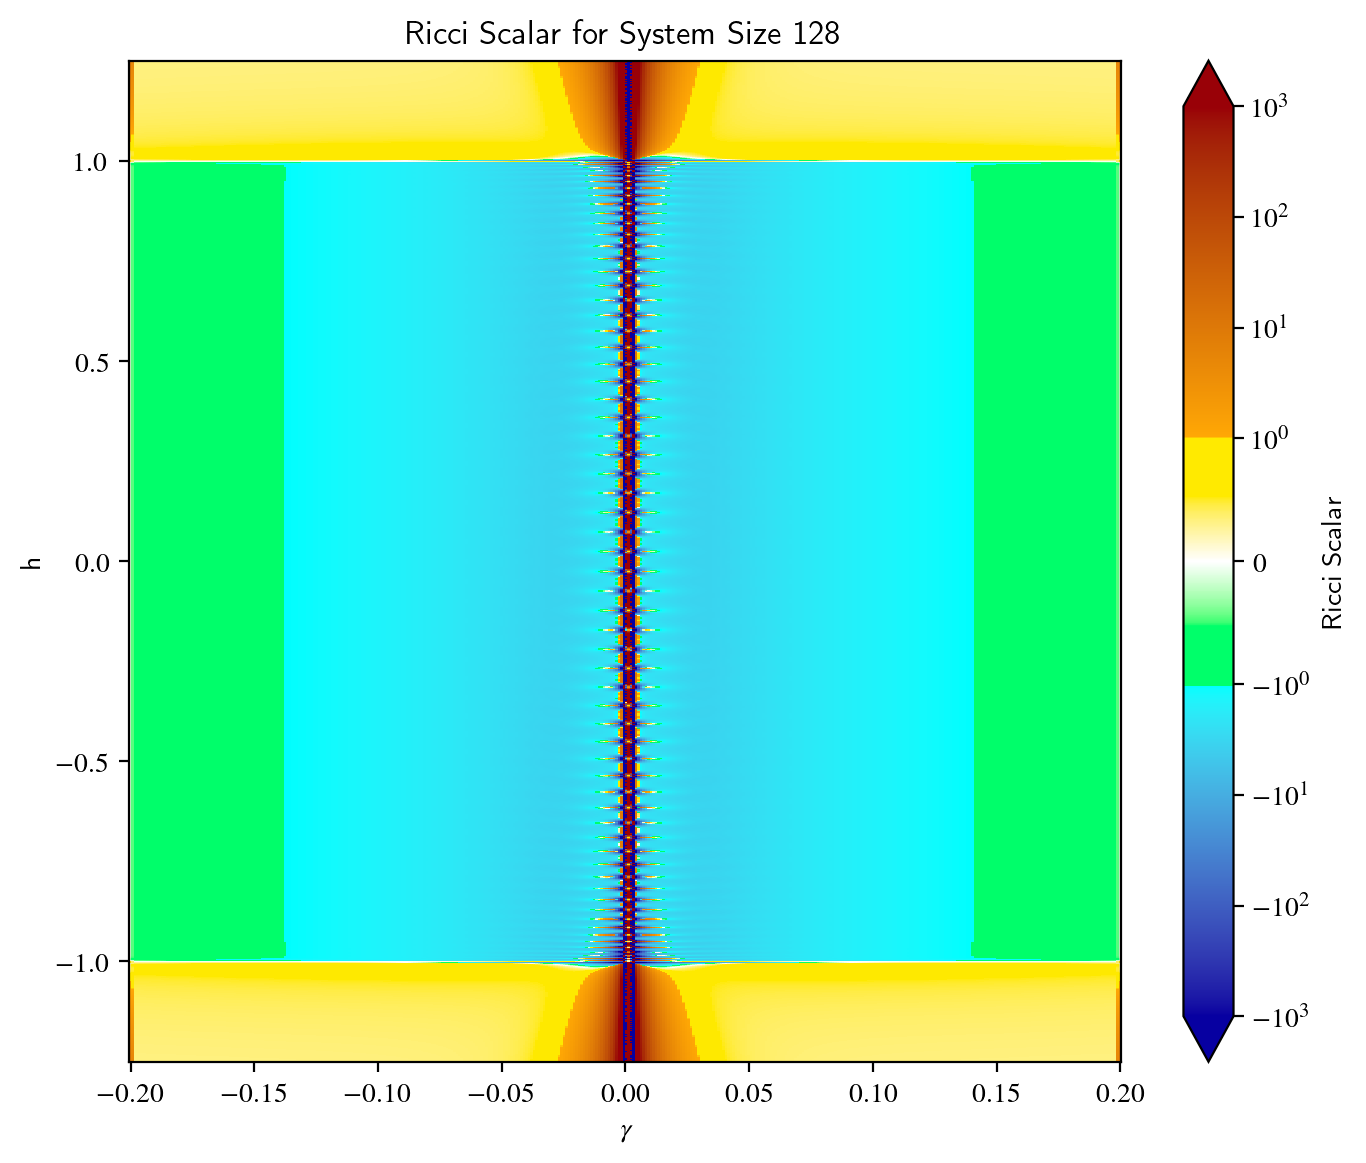

In [61]:
plt.figure(figsize=(8,6.5), dpi = 200)

vmax = 1000
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh, offset = 0.412)


Main_DS['Ricci Scalar'].plot.imshow(x = 'gamma', y = 'h', vmin = -vmax, vmax = vmax, norm = colors.SymLogNorm(linthresh = linthresh), cmap = cmap)
plt.xlabel(r'$\gamma$')
plt.title(f"Ricci Scalar for System Size {Main_DS['Metric'].attrs['N']}")

### The Metric

/tmp/ipykernel_1489827/2268013165.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


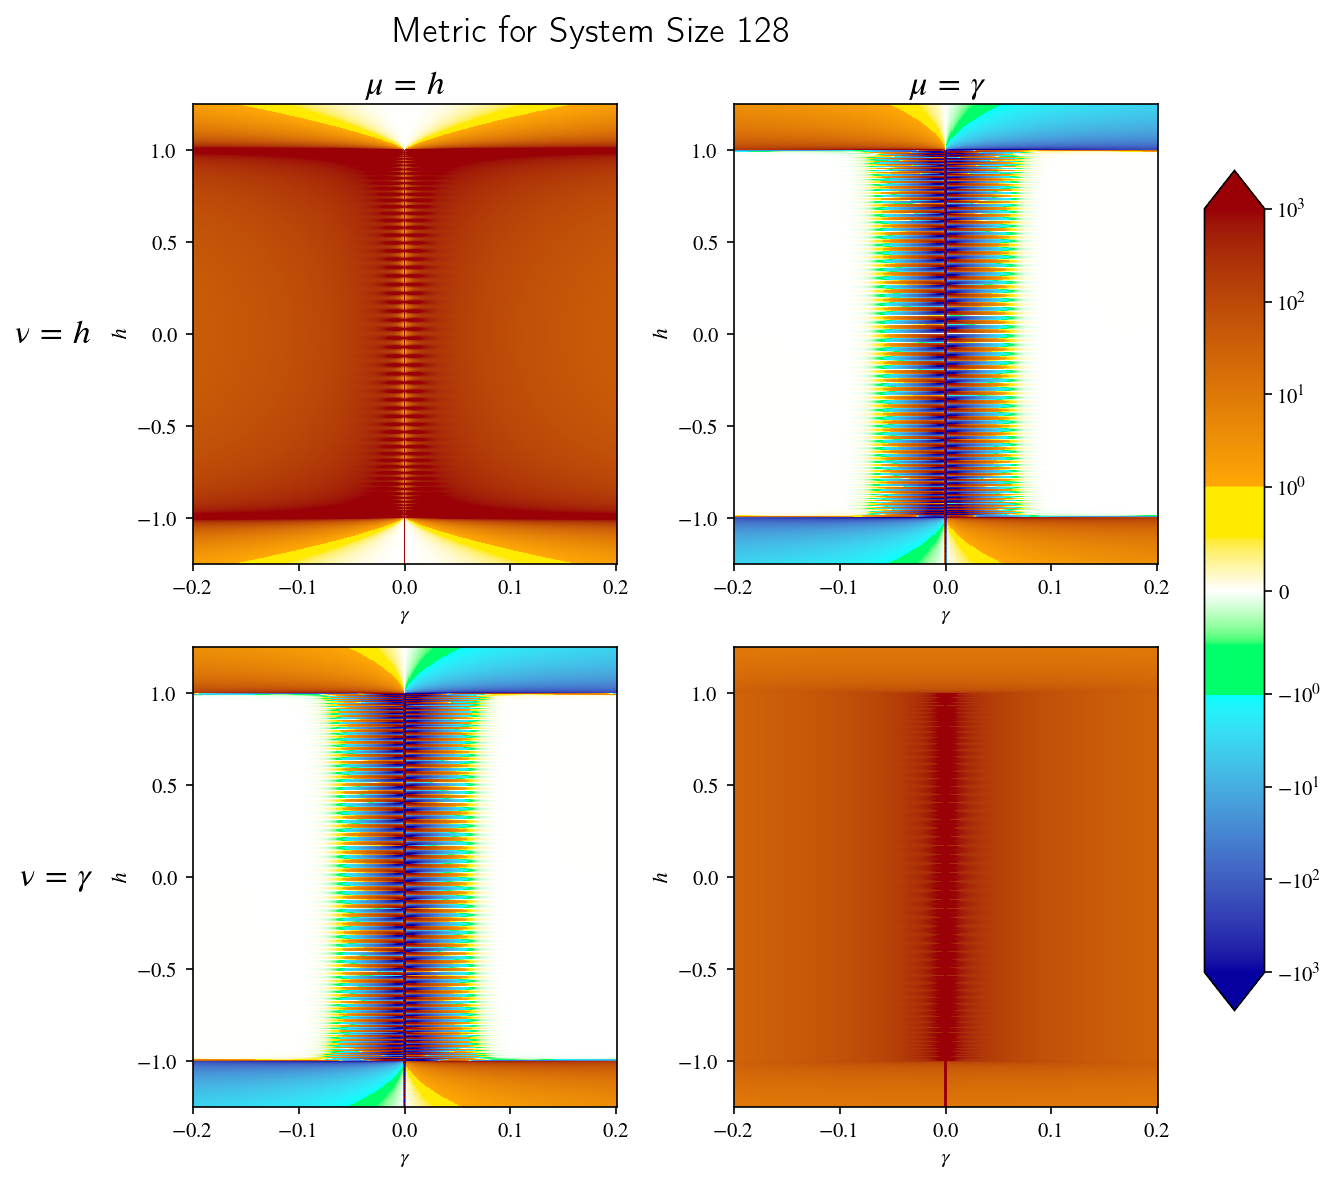

In [66]:
#col_names = [r'h', r'$\gamma$']
col_labels = [r'$\mu = h$', r'$\mu = \gamma$']
row_labels = [r'$\nu = h$',r'$\nu = \gamma$']


vmax = 1000
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh, offset = 0.412)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8), dpi = 150)

for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        dat = Main_DS['Metric'][:, :, row, col].values
        
        x = Main_DS['Metric'].coords['gamma'].values
        y = Main_DS['Metric'].coords['h'].values

        im = axes[row, col].pcolormesh(x,y, dat, norm = colors.SymLogNorm(linthresh=linthresh, vmin = -vmax, vmax = vmax), cmap = cmap)
        axes[row,col].set_xlabel(r'$\gamma$')
        axes[row,col].set_ylabel(r'$h$')

pad = 5
for ax, name in zip(axes[0], col_labels):
    ax.annotate(name, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                fontsize = 16, ha='center', va='baseline')

for ax, name in zip(axes[:,0], row_labels):
    ax.annotate(name, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                xycoords=ax.yaxis.label, textcoords='offset points',
                fontsize = 16, ha='right', va='center')


cbar_ax = fig.add_axes([1.01, 0.15, 0.05, 0.7])  
fig.colorbar(im, cax = cbar_ax, extend = 'both')
fig.suptitle(f"Metric for System Size {Main_DS['Metric'].attrs['N']}",fontsize = 18)
fig.tight_layout()


## Antipodal Defects Avoiding Zero Modes

In this setup, the system is a periodic critical TFI chain with two bond defects at N//4-1 and 3N//4-1 (opposite of each other), with strength $J_{x,1}$ and $J_{x,2}$. This looks at the quantum metric in the space $(J_{x,1}, J_{x,2})$

### Setup

In [128]:
# Looking At Antipodal Defect
step = 0.05

Jx1_Array = np.arange(-0.9,2.1+step, step)

Jx2_Array = Jx1_Array #np.round(np.arange(-1.2,-0.8+step, step), 13)

Model_Antipodal_DA = xr.DataArray(None, coords=(dict(Jx1 = Jx1_Array, Jx2=Jx2_Array)), dims = ('Jx1', 'Jx2')).astype(object)


In [129]:
print(f'len(h_array): {len(Jx1_Array)}\nlen(gamma_array): {len(Jx2_Array)}')
print(f'Number of Models: {len(Jx1_Array)*len(Jx2_Array)}')

Ns = [16]

len(h_array): 61
len(gamma_array): 61
Number of Models: 3721


In [130]:
if True:
    for N in Ns:
        print(f'Doing N: {N}')
        Model_Antipodal_DA.attrs['N'] = N
        for Jx1 in Jx1_Array:
            for Jx2 in Jx2_Array:
                Jx_Array = np.ones(N)
                Jx_Array[N//4-1] = Jx1
                Jx_Array[3*N//4-1] = Jx2
                Model_Antipodal_DA.loc[(Jx1, Jx2)] = MFC.MajoranaFermionChain(N = N, Jx = Jx_Array, g = 1, cutoff = 13)

                Model_Antipodal_DA.loc[(Jx1, Jx2)].item().Ham_Builder()
                B, W = la.schur(np.real(2j*Model_Antipodal_DA.loc[(Jx1, Jx2)].item().Ham))

                Model_Antipodal_DA.loc[(Jx1, Jx2)].item().Get_Gamma_A(Return = False, Given_Schur = [B,W])

        print(f'    Getting g_DA')
        g_DA, K_DA = GQT.Get_g(Model_Antipodal_DA, Return_K_DA=True)    

        print(f'    Getting Christoffel_DA') 
        Christoffel_DA = GQT.Get_Christoffel_Connection(g_DA, dims=2)

        print(f'    Getting Ricci_DA')
        Ricci_DA = GQT.Get_Ricci_Tensor(g_DA, Christoffel_DA, 2)

        print(f'    Getting Ricci_Scalar_DA')
        Ricci_Scalar_DA = GQT.Get_Ricci_Scalar(Ricci_DA= Ricci_DA, g_DA= g_DA,  dims = 2)

        name = 'Looking_Around_0_1_Antipodal_For_N_'+str(N)

        with open('Code/QuantumTensorFiles/Final_Files/'+name+'_g', 'wb') as file:
            pickle.dump(g_DA, file)
        
        with open('Code/QuantumTensorFiles/Final_Files/'+name+'_Ricci_Scalar', 'wb') as file:
            pickle.dump(Ricci_Scalar_DA, file)

Main_Antipodal_Dict = {}
for N in Ns:
    name = 'Looking_Around_0_1_Antipodal_For_N_'+str(N)
    Main_Antipodal_Dict[N] = {}
    with open('Code/QuantumTensorFiles/Final_Files/'+name+'_g', 'rb') as file:
            Main_Antipodal_Dict[N]['Metric'] = pickle.load(file)
    
    with open('Code/QuantumTensorFiles/Final_Files/'+name+'_Ricci_Scalar', 'rb') as file:
            Main_Antipodal_Dict[N]['Ricci Scalar'] = pickle.load(file)

Doing N: 16
    Getting g_DA


/local/gr400/anaconda3/lib/python3.10/site-packages/xarray/core/indexing.py:1341: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value


    Getting Christoffel_DA


/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/GettingQuantumTensor.py:131: ComplexWarning: Casting complex values to real discards the imaginary part
  Gamma[i_mu, i_nu, i_rho] = Christoffel_Elements(g, pdg, i_mu, i_nu, i_rho, g_inv = g_inv)


    Getting Ricci_DA


/local/gr400/anaconda3/lib/python3.10/site-packages/xarray/core/indexing.py:1341: ComplexWarning: Casting complex values to real discards the imaginary part
  array[key] = value


    Getting Ricci_Scalar_DA


### Metric

<Figure size 1800x1200 with 0 Axes>

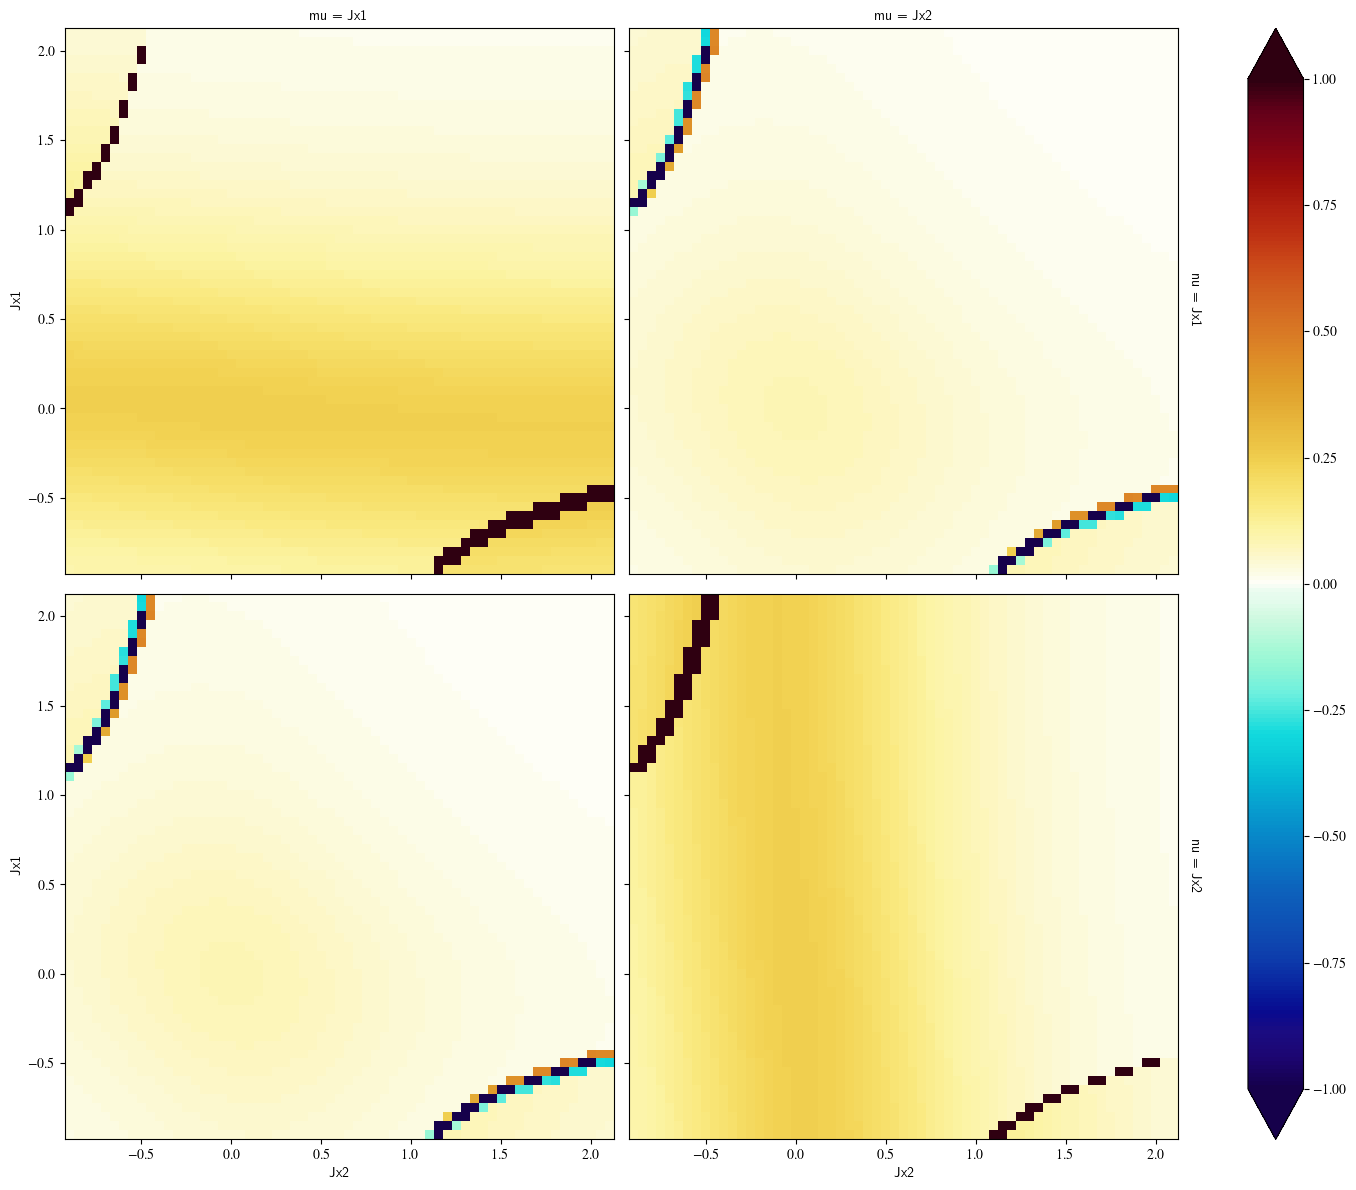

In [132]:
plt.figure(figsize=(9,6), dpi = 200)
N = 16

vmax = max([np.abs(Main_Antipodal_Dict[N]['Metric'].real.max().item()), np.abs(Main_Antipodal_Dict[N]['Metric'].real.min().item())])

vmax = 1
vmin = -vmax

linthresh = 1

cmap = cmaps.div1_blue_orange#MFC.symlog_cmap(vmax, linthresh, offset = 0.405)
#cmap = MFC.symlog_cmap(vmax, linthresh, offset = 0.4)

Main_Antipodal_Dict[N]['Metric'].real.plot.imshow(col = 'mu', row = 'nu', cmap = cmap, figsize=(15, 12), vmin = vmin, vmax =vmax)#, norm = colors.SymLogNorm(linthresh=linthresh, vmin = -vmax, vmax = vmax))
#g_DA.loc[{'gamma':gamma, 'nu':'gamma'}].plot.line(x = 'h', add_legend = True)

#cmap = cmaps.chroma


The divergent terms here are along $J_{x,1} = -1/J_{x,2}$

### Ricci Scalar

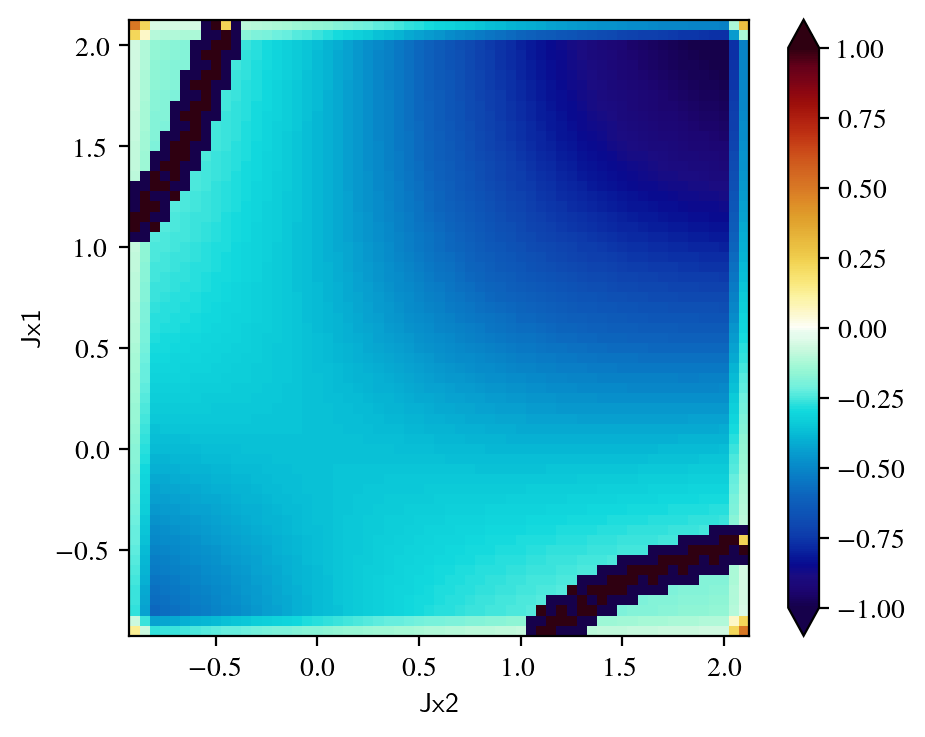

In [134]:
plt.figure(figsize=(5,4), dpi = 200)
N = 16

vmax = max([np.abs(Main_Antipodal_Dict[N]['Ricci Scalar'].real.max().item()), np.abs(Main_Antipodal_Dict[N]['Ricci Scalar'].real.min().item())])

vmax = 1
vmin = -vmax


cmap = cmaps.div1_blue_orange#MFC.symlog_cmap(vmax, linthresh, offset = 0.405)

Main_Antipodal_Dict[N]['Ricci Scalar'].plot(cmap = cmap, vmin = vmin, vmax = vmax)

Because of the finite size, the derivatives become badly behaved at the boundary, so there is a buffer of a few sites before the results are what they should be. 

# Entanglement Calculating Hamiltonians

For the entanglement hamiltonian, this code uses MPMath and the MajoranaFermionChain_MPM class in the code. The decimal precision, mpm.mp.dps should be at least 2x the system size. Though, for certain situations, it needs to be increased by a few factors. 

Also, these calculations are slow! The ones in the examples below take ~2-3 min to run. 

I have been able to get half interval entanglement Hamiltonians for N = 1024, however, this took over a week to run.  

## Critical TFI Model

In [137]:
mpm_model_1 = MFC.MajoranaFermionChain_MPM(N = 64)

In [139]:
interval = [0,mpm_model_1.N//2-1]

mpm.mp.dps = 2*mpm_model_1.N

E_H = mpm_model_1.Get_E_H(interval = interval)

In [145]:
E_H_np = MFC.MPM_Mat_To_NP(E_H)

E_H_Re = np.real(E_H_np)
E_H_Im = np.imag(E_H_np)

print(f'Max of E_H_Re: {E_H_Re.max()}.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.')

Max of E_H_Re: 1.3239360141408291e-67.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.


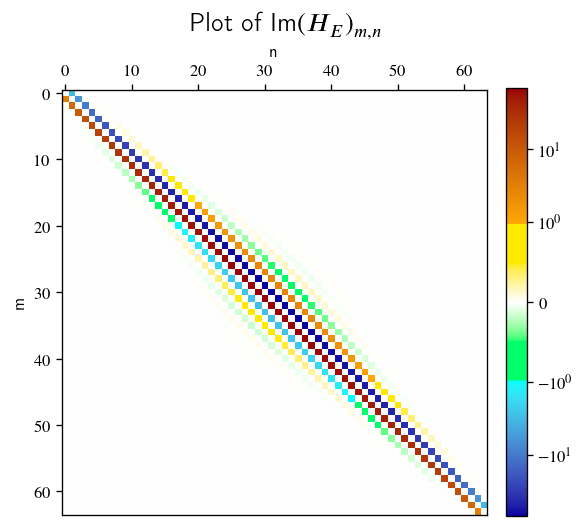

In [172]:
vmax = E_H_Im.max()
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh)

MFC.Matrix_Plotter(E_H_Im, cmap = cmap, cbarscale = 'symlog', linthresh = linthresh, title = r'Plot of $\text{Im}(H_E)_{m,n}$')

### Quick Note about the matrix plotter!

The "Matrix_Plotter" function can take in both real and complex matrices. For complex matrices, it either plots the real and imaginary parts separately or it plots magnitude and phase. 

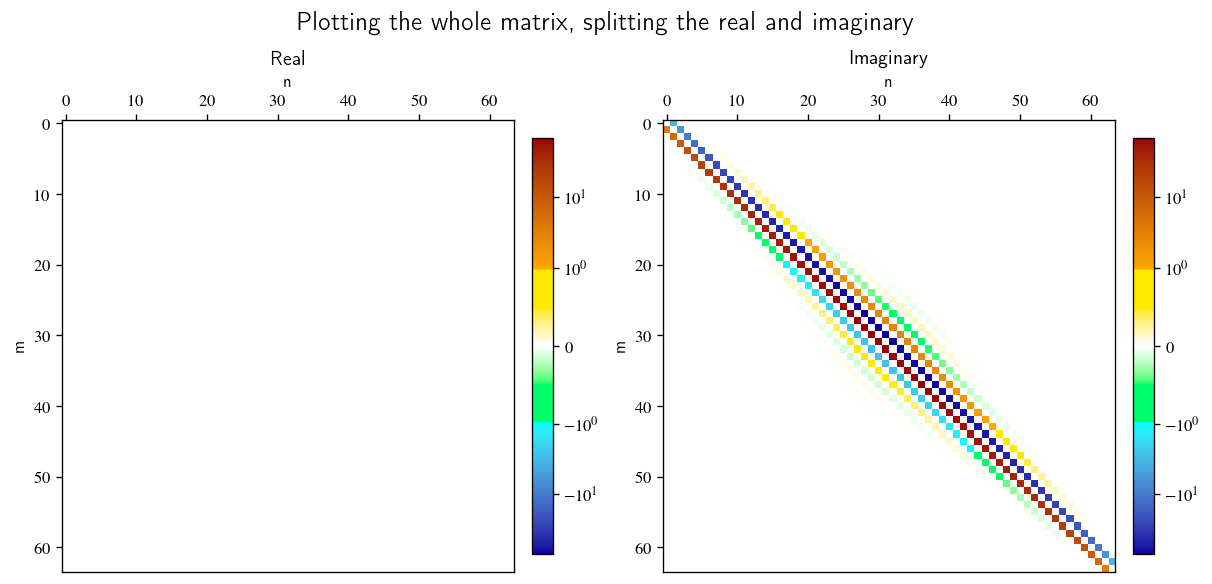

/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/MajoranaFermionChain.py:3070: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(**subplot_adjust)


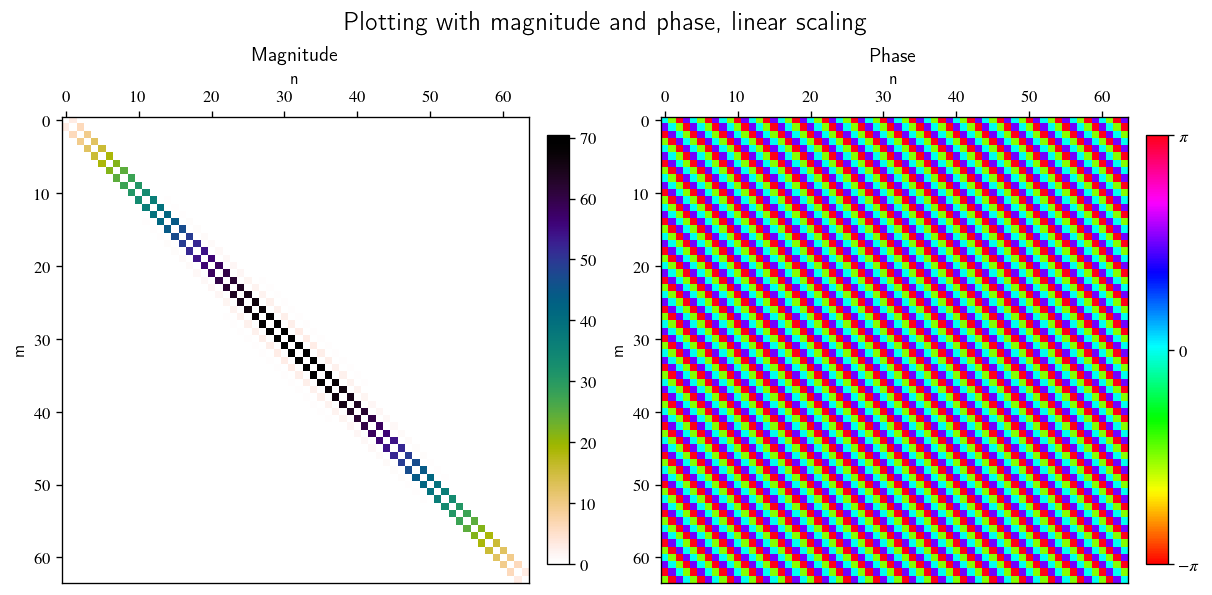

/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/MajoranaFermionChain.py:3070: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(**subplot_adjust)


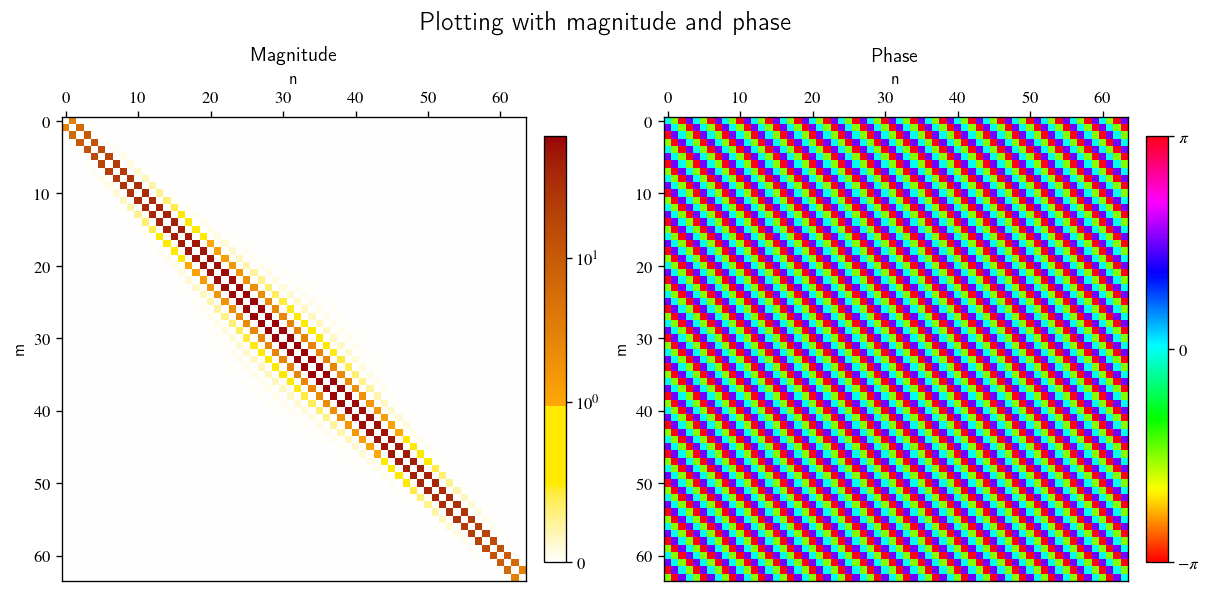

/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/MajoranaFermionChain.py:3070: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(**subplot_adjust)


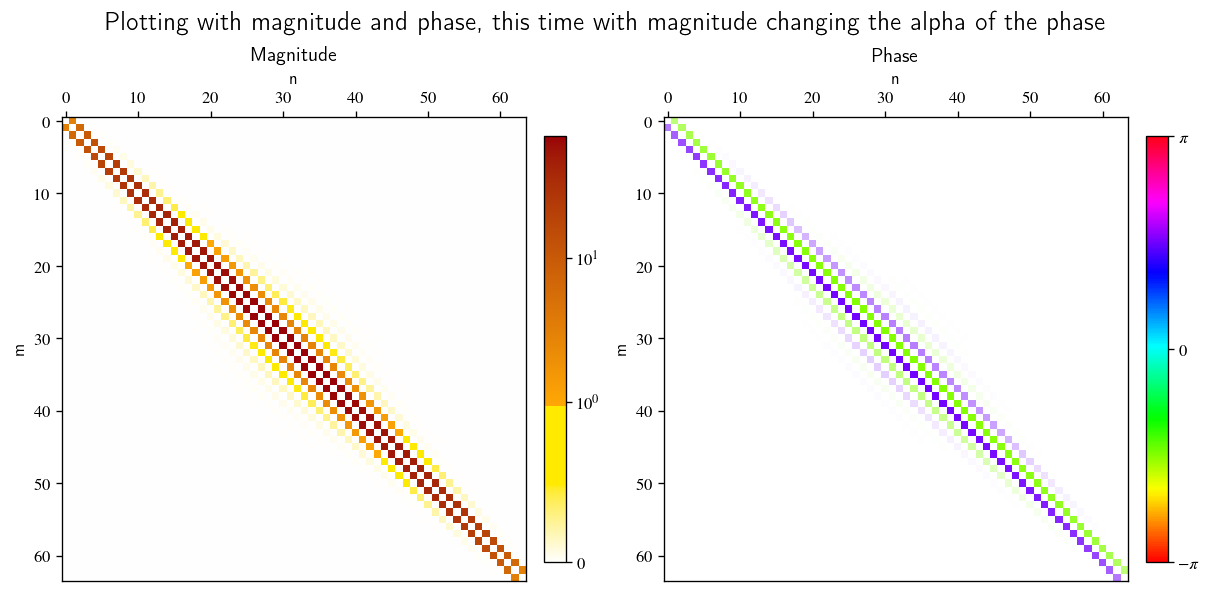

/local/gr400/Git Repositories/Code-Demos/Free Fermion Code/Code/MajoranaFermionChain.py:3070: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(**subplot_adjust)


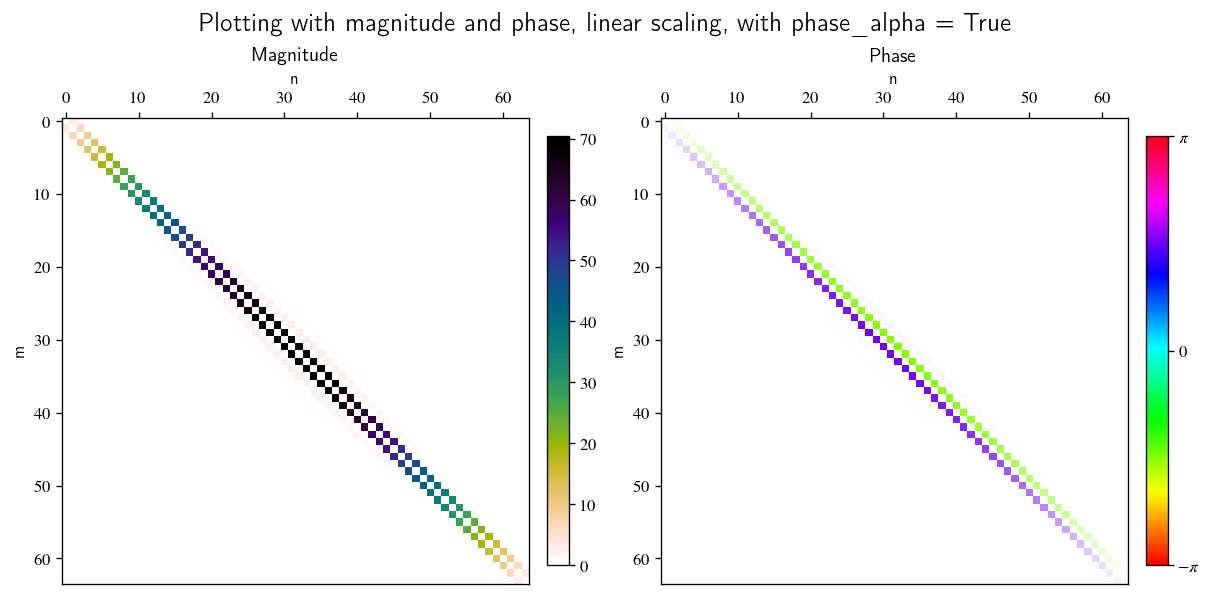

In [268]:
vmax = np.abs(E_H_np).max()
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh)

MFC.Matrix_Plotter(E_H_np, cmap = cmap, cbarscale = 'symlog', linthresh = linthresh, title = r'Plotting the whole matrix, splitting the real and imaginary', figsize = (10,5), center_zero = True)

MFC.Matrix_Plotter(E_H_np, cmap = cmaps.rainforest_r, title = r'Plotting with magnitude and phase, linear scaling', figsize = (10,5), center_zero = True, magnitude_phase = True)

cmap = MFC.symlog_cmap(vmax, linthresh, half = 'upper')
MFC.Matrix_Plotter(E_H_np, cmap = cmap, cbarscale = 'symlog', linthresh = 1, title = r'Plotting with magnitude and phase', figsize = (10,5), center_zero = True, magnitude_phase = True)
MFC.Matrix_Plotter(E_H_np, cmap = cmap, cbarscale = 'symlog', linthresh = 1, title = r'Plotting with magnitude and phase, this time with magnitude changing the alpha of the phase', figsize = (10,5), center_zero = True, magnitude_phase = True, phase_alpha = True)
MFC.Matrix_Plotter(E_H_np, cmap = cmaps.rainforest_r, title = r'Plotting with magnitude and phase, linear scaling, with phase_alpha = True', figsize = (10,5), center_zero = True, magnitude_phase = True, phase_alpha = True)

## Single Central Defect

In [173]:
N = 64
Jx = np.ones(N)
Jx[N//4-1] = 0.2
mpm_model_2 = MFC.MajoranaFermionChain_MPM(N = N, Jx = Jx)

In [175]:
interval = [0,mpm_model_2.N//2-1]

mpm.mp.dps = 2*mpm_model_2.N

E_H_2 = mpm_model_2.Get_E_H(interval = interval)

In [176]:
E_H_np_2 = MFC.MPM_Mat_To_NP(E_H_2)

E_H_Re_2 = np.real(E_H_np_2)
E_H_Im_2 = np.imag(E_H_np_2)

print(f'Max of E_H_Re: {E_H_Re_2.max()}.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.')

Max of E_H_Re: 1.567569648049098e-69.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.


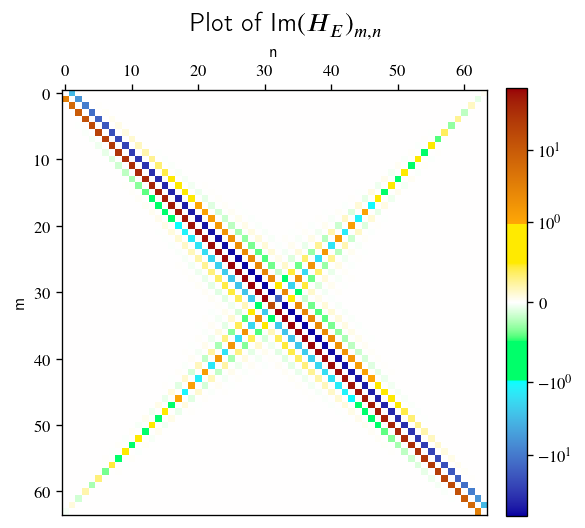

In [184]:
vmax = E_H_Im_2.max()
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh)

MFC.Matrix_Plotter(E_H_Im_2, cmap = cmap, cbarscale = 'symlog', linthresh = linthresh, title = r'Plot of $\text{Im}(H_E)_{m,n}$', center_zero = True)

## Single Central Defect With a Zero Mode!

### Antiperiodic

In [269]:
N = 64
Jx = np.ones(N)
Jx[N//4-1] = -1
mpm_model_AP_Zero_Mode = MFC.MajoranaFermionChain_MPM(N = N, Jx = Jx)

In [270]:
interval = [0,mpm_model_AP_Zero_Mode.N//2-1]

mpm.mp.dps = 4*mpm_model_AP_Zero_Mode.N

E_H_AP_Zero_Mode = mpm_model_AP_Zero_Mode.Get_E_H(interval = interval)

In [271]:
E_H_np_AP_Zero_Mode = MFC.MPM_Mat_To_NP(E_H_AP_Zero_Mode)

E_H_Re_AP_Zero_Mode = np.real(E_H_np_AP_Zero_Mode)
E_H_Im_AP_Zero_Mode = np.imag(E_H_np_AP_Zero_Mode)

print(f'Max of E_H_Re: {E_H_Re_AP_Zero_Mode.max()}.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.')

Max of E_H_Re: 9.22932361592676e-198.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.


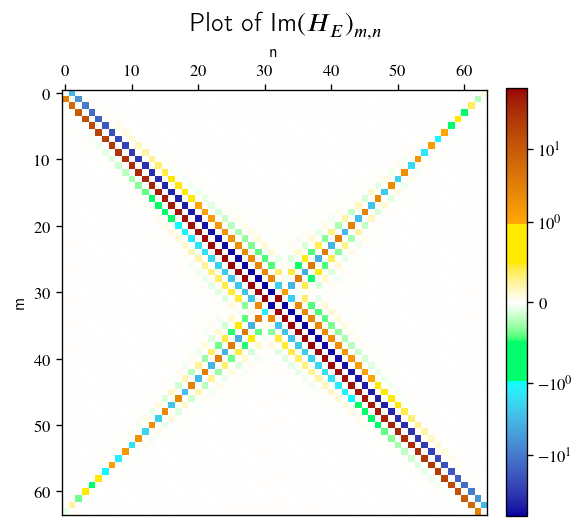

In [273]:
vmax = E_H_Im_AP_Zero_Mode.max()
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh)

MFC.Matrix_Plotter(E_H_Im_AP_Zero_Mode, cmap = cmap, cbarscale = 'symlog', linthresh = linthresh, title = r'Plot of $\text{Im}(H_E)_{m,n}$', center_zero = True)

### Duality Defect

In [275]:
N = 64
Jx = np.ones(N)
g = np.ones(N)
Jx[N//4-1] = 0
g[N//4] = 0
duality = np.zeros(N)
duality[N//4-1] = 1

mpm_model_DD_Zero_Mode = MFC.MajoranaFermionChain_MPM(N = N, Jx = Jx, g = g, b_sigma=duality)

In [276]:
interval = [0,mpm_model_DD_Zero_Mode.N//2-1]

mpm.mp.dps = 4*mpm_model_DD_Zero_Mode.N

E_H_DD_Zero_Mode = mpm_model_DD_Zero_Mode.Get_E_H(interval = interval)

In [278]:
E_H_np_DD_Zero_Mode = MFC.MPM_Mat_To_NP(E_H_DD_Zero_Mode)

E_H_Re_DD_Zero_Mode = np.real(E_H_np_DD_Zero_Mode)
E_H_Im_DD_Zero_Mode = np.imag(E_H_np_DD_Zero_Mode)

print(f'Max of E_H_Re: {E_H_Re_DD_Zero_Mode.max()}.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.')

Max of E_H_Re: 1.2123394581440028e-195.  This number should be O(10^-N) or smaller. If it is not, then the decimal precision should be increased.


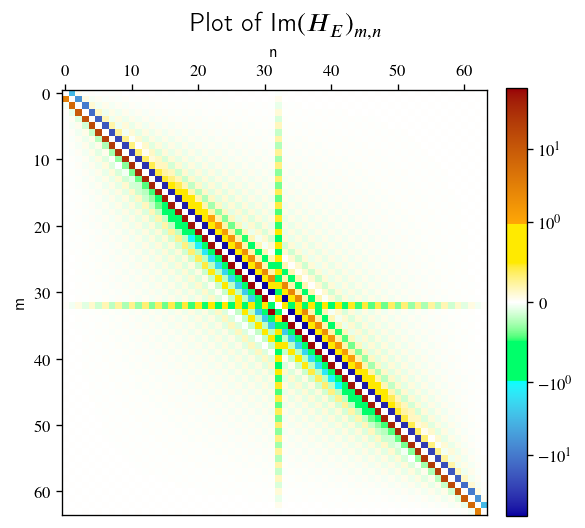

In [279]:
vmax = E_H_Im_DD_Zero_Mode.max()
linthresh = 1
cmap = MFC.symlog_cmap(vmax, linthresh)

MFC.Matrix_Plotter(E_H_Im_DD_Zero_Mode, cmap = cmap, cbarscale = 'symlog', linthresh = linthresh, title = r'Plot of $\text{Im}(H_E)_{m,n}$', center_zero = True)